<a href="https://colab.research.google.com/github/hcostanog-AI/Framing-the-Climate-Divide/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4

import requests
from bs4 import BeautifulSoup
import os

# Constants
URL = "https://unfccc-cop24.streamworld.de/videos/cop15-copenhagen"
HEADERS = {"User-Agent": "Mozilla/5.0"}
SAVE_DIR = "cop15_high_level_english"
os.makedirs(SAVE_DIR, exist_ok=True)

# Step 1: Load page
response = requests.get(URL, headers=HEADERS)
soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Find all High-Level Segment sections
h3_tags = soup.find_all("h3")
total_downloads = 0

for h3 in h3_tags:
    if "High Level Segment" in h3.text:
        table = h3.find_next("table")
        if table:
            rows = table.find_all("tr")
            for row in rows:
                tds = row.find_all("td")
                if len(tds) >= 3:
                    speaker = tds[0].text.strip()
                    a_tag = tds[2].find("a")
                    if a_tag:
                        en_link = a_tag["href"]
                        if en_link.endswith("_en.mp4"):
                            filename = en_link.split("/")[-1]
                            filepath = os.path.join(SAVE_DIR, filename)

                            print(f"⬇️ Downloading {speaker}: {filename}")
                            try:
                                with requests.get(en_link, stream=True, timeout=30) as r:
                                    r.raise_for_status()
                                    with open(filepath, "wb") as f:
                                        for chunk in r.iter_content(chunk_size=8192):
                                            f.write(chunk)
                                print(f"✅ Saved to: {filepath}\n")
                                total_downloads += 1
                            except Exception as e:
                                print(f"❌ Failed to download {filename}: {e}\n")

print(f"\n🎉 Downloaded {total_downloads} High-Level English videos.")

⬇️ Downloading Welcoming ceremony: lecture_37823_en.mp4
✅ Saved to: cop15_high_level_english/lecture_37823_en.mp4

⬇️ Downloading Cultural event: lecture_37824_en.mp4
✅ Saved to: cop15_high_level_english/lecture_37824_en.mp4

⬇️ Downloading H.E. Mr. Lars Løkke Rasmussen: lecture_37825_en.mp4
✅ Saved to: cop15_high_level_english/lecture_37825_en.mp4

⬇️ Downloading Mr. BAN Ki-moon: lecture_37826_en.mp4
✅ Saved to: cop15_high_level_english/lecture_37826_en.mp4

⬇️ Downloading H.E. Ms. Connie Hedegaard: lecture_37827_en.mp4
✅ Saved to: cop15_high_level_english/lecture_37827_en.mp4

⬇️ Downloading Mr. Yvo de Boer: lecture_37828_en.mp4
✅ Saved to: cop15_high_level_english/lecture_37828_en.mp4

⬇️ Downloading HRH the Prince of Wales: lecture_37829_en.mp4
✅ Saved to: cop15_high_level_english/lecture_37829_en.mp4

⬇️ Downloading Opening: lecture_37868_en.mp4
✅ Saved to: cop15_high_level_english/lecture_37868_en.mp4

⬇️ Downloading H.E. Mr. Nafie Ali Nafie: lecture_37869_en.mp4
✅ Saved to: cop1

In [ ]:
!apt-get update
!apt-get install -y ffmpeg
!pip install git+https://github.com/m-bain/whisperx
!pip install torch

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,840 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,762 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-up

In [ ]:
# 🚀 INSTALL DEPENDENCIES
!apt-get update
!apt-get install -y ffmpeg
!pip install requests beautifulsoup4
!pip install git+https://github.com/m-bain/whisperx
!pip install torch

# 🚀 IMPORT LIBRARIES
import os
import requests
from bs4 import BeautifulSoup
import subprocess
import whisperx
import torch

# 🚀 CONFIGURATION
URL = "https://unfccc-cop24.streamworld.de/videos/cop15-copenhagen"
HEADERS = {"User-Agent": "Mozilla/5.0"}

VIDEO_DIR = "cop15_high_level_english"
AUDIO_DIR = "cop15_high_level_audio"
TRANSCRIPTS_DIR = "cop15_transcripts"

os.makedirs(VIDEO_DIR, exist_ok=True)
os.makedirs(AUDIO_DIR, exist_ok=True)
os.makedirs(TRANSCRIPTS_DIR, exist_ok=True)

#  STEP 1: DOWNLOAD VIDEOS
print("🔍 Fetching video links...")
response = requests.get(URL, headers=HEADERS)
soup = BeautifulSoup(response.text, "html.parser")

h3_tags = soup.find_all("h3")
total_downloads = 0

for h3 in h3_tags:
    if "High Level Segment" in h3.text:
        table = h3.find_next("table")
        if table:
            rows = table.find_all("tr")
            for row in rows:
                tds = row.find_all("td")
                if len(tds) >= 3:
                    speaker = tds[0].text.strip()
                    a_tag = tds[2].find("a")
                    if a_tag:
                        en_link = a_tag["href"]
                        if en_link.endswith("_en.mp4"):
                            filename = en_link.split("/")[-1]
                            filepath = os.path.join(VIDEO_DIR, filename)

                            if os.path.exists(filepath):
                                print(f"⏩ Already downloaded: {filename}")
                                continue

                            print(f"⬇️ Downloading {speaker}: {filename}")
                            try:
                                with requests.get(en_link, stream=True, timeout=30) as r:
                                    r.raise_for_status()
                                    with open(filepath, "wb") as f:
                                        for chunk in r.iter_content(chunk_size=8192):
                                            f.write(chunk)
                                print(f"✅ Saved: {filepath}")
                                total_downloads += 1
                            except Exception as e:
                                print(f"❌ Error downloading {filename}: {e}")

print(f"\n🎉 Downloaded {total_downloads} videos.")

#  STEP 2: EXTRACT AUDIO
video_files = [f for f in os.listdir(VIDEO_DIR) if f.endswith(".mp4")]
print(f"🎵 Extracting audio from {len(video_files)} videos...")

for video_file in video_files:
    video_path = os.path.join(VIDEO_DIR, video_file)
    audio_file = video_file.replace(".mp4", ".wav")
    audio_path = os.path.join(AUDIO_DIR, audio_file)

    if os.path.exists(audio_path):
        print(f"⏩ Audio already exists: {audio_file}")
        continue

    print(f"🎵 Extracting: {audio_file}")
    cmd = [
        "ffmpeg",
        "-i", video_path,
        "-vn",
        "-acodec", "pcm_s16le",
        "-ar", "16000",
        "-ac", "1",
        audio_path
    ]
    subprocess.run(cmd, check=True)

print("✅ Audio extraction complete.")

#  STEP 3: TRANSCRIBE WITH WHISPERX
device = "cuda" if torch.cuda.is_available() else "cpu"
model = whisperx.load_model("base", device, compute_type="float32")  # or "large-v2" if you prefer

audio_files = [f for f in os.listdir(AUDIO_DIR) if f.endswith(".wav")]
print(f"📝 Transcribing {len(audio_files)} audio files...")

for audio_file in audio_files:
    audio_path = os.path.join(AUDIO_DIR, audio_file)
    transcript_path = os.path.join(TRANSCRIPTS_DIR, audio_file.replace(".wav", ".txt"))

    if os.path.exists(transcript_path):
        print(f"⏩ Already transcribed: {audio_file}")
        continue

    print(f"📝 Transcribing: {audio_file}")
    result = model.transcribe(audio_path, language="en")   # 👈 LANGUAGE FORCED HERE

    with open(transcript_path, "w", encoding="utf-8") as f:
        for segment in result["segments"]:
            f.write(f"[{segment['start']:.2f} - {segment['end']:.2f}] {segment['text']}\n")

    print(f"✅ Transcript saved: {transcript_path}")

print("All done!")


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warn

config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

vocabulary.txt: 0.00B [00:00, ?B/s]

model.bin:   0%|          | 0.00/145M [00:00<?, ?B/s]

No language specified, language will be first be detected for each audio file (increases inference time).
>>Performing voice activity detection using Pyannote...


INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../usr/local/lib/python3.11/dist-packages/whisperx/assets/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.3.2. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.6.0+cu124. Bad things might happen unless you revert torch to 1.x.
📝 Transcribing 224 audio files...
📝 Transcribing: lecture_37994_en.wav
✅ Transcript saved: cop15_transcripts/lecture_37994_en.txt
📝 Transcribing: lecture_38063_en.wav
✅ Transcript saved: cop15_transcripts/lecture_38063_en.txt
📝 Transcribing: lecture_38096_en.wav
✅ Transcript saved: cop15_transcripts/lecture_38096_en.txt
📝 Transcribing: lecture_37993_en.wav
✅ Transcript saved: cop15_transcripts/lecture_37993_en.txt
📝 Transcribing: lecture_37927_en.wav
✅ Transcript saved: cop15_transcripts/lecture_37927_en.txt
📝 Transcribing: lecture_38083_en.wav
✅ Transcript saved: cop15_transcripts/lecture_38083_en.txt
📝 Transcribing: lecture_38082_en.wav
✅ Transcript saved: cop15_transcripts/lecture_38082_en.txt
📝 Transcribing: lecture_38162_en.wav
✅ Transcri

In [ ]:
import requests
import json
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# Constants
URL = "https://unfccc-cop24.streamworld.de/videos/cop15-copenhagen"
HEADERS = {"User-Agent": "Mozilla/5.0"}

# Fetch the main page
response = requests.get(URL, headers=HEADERS)
soup = BeautifulSoup(response.text, "html.parser")

# Create an empty mapping
filename_to_speaker = {}

# Look for all high-level segment sections
h3_tags = soup.find_all("h3")
for h3 in h3_tags:
    if "High Level Segment" in h3.text:
        table = h3.find_next("table")
        if table:
            rows = table.find_all("tr")
            for row in rows:
                tds = row.find_all("td")
                if len(tds) >= 3:
                    speaker = tds[0].text.strip()
                    a_tag = tds[2].find("a")
                    if a_tag:
                        en_link = a_tag["href"]
                        if en_link.endswith("_en.mp4"):
                            filename = en_link.split("/")[-1]
                            filename_no_ext = filename.replace(".mp4", "")
                            filename_to_speaker[filename_no_ext] = speaker

# Save the mapping to a JSON file
with open("filename_to_speaker.json", "w") as f:
    json.dump(filename_to_speaker, f)

print("✅ filename_to_speaker.json has been created with the mapping.")

In [ ]:
import os
import json
import shutil
import re

# Load the mapping
with open("filename_to_speaker.json", "r") as f:
    filename_to_speaker = json.load(f)

# Directories
AUDIO_DIR = "cop15_high_level_audio"
TRANSCRIPT_DIR = "cop15_transcripts"

# Function to clean speaker name for filenames
def clean_filename(name):
    name = re.sub(r"[^\w\s-]", "", name)  # Remove special characters
    name = re.sub(r"\s+", "_", name)      # Replace spaces with underscores
    return name.strip("_")

renamed = 0

# Loop through mapping and rename files
for base_filename, speaker in filename_to_speaker.items():
    safe_name = clean_filename(speaker)

    # Audio file
    old_audio_path = os.path.join(AUDIO_DIR, f"{base_filename}.wav")
    new_audio_path = os.path.join(AUDIO_DIR, f"{safe_name}.wav")

    # Transcript file
    old_transcript_path = os.path.join(TRANSCRIPT_DIR, f"{base_filename}.txt")
    new_transcript_path = os.path.join(TRANSCRIPT_DIR, f"{safe_name}.txt")

    # Rename if files exist
    if os.path.exists(old_audio_path):
        shutil.move(old_audio_path, new_audio_path)
        print(f"🔊 Renamed: {old_audio_path} → {new_audio_path}")
        renamed += 1

    if os.path.exists(old_transcript_path):
        shutil.move(old_transcript_path, new_transcript_path)
        print(f"📝 Renamed: {old_transcript_path} → {new_transcript_path}")
        renamed += 1

print(f"\n✅ Renamed {renamed} files total.")

🔊 Renamed: cop15_high_level_audio/lecture_37823_en.wav → cop15_high_level_audio/Welcoming_ceremony.wav
📝 Renamed: cop15_transcripts/lecture_37823_en.txt → cop15_transcripts/Welcoming_ceremony.txt
🔊 Renamed: cop15_high_level_audio/lecture_37824_en.wav → cop15_high_level_audio/Cultural_event.wav
📝 Renamed: cop15_transcripts/lecture_37824_en.txt → cop15_transcripts/Cultural_event.txt
🔊 Renamed: cop15_high_level_audio/lecture_37825_en.wav → cop15_high_level_audio/HE_Mr_Lars_Løkke_Rasmussen.wav
📝 Renamed: cop15_transcripts/lecture_37825_en.txt → cop15_transcripts/HE_Mr_Lars_Løkke_Rasmussen.txt
🔊 Renamed: cop15_high_level_audio/lecture_37826_en.wav → cop15_high_level_audio/Mr_BAN_Ki-moon.wav
📝 Renamed: cop15_transcripts/lecture_37826_en.txt → cop15_transcripts/Mr_BAN_Ki-moon.txt
🔊 Renamed: cop15_high_level_audio/lecture_37827_en.wav → cop15_high_level_audio/HE_Ms_Connie_Hedegaard.wav
📝 Renamed: cop15_transcripts/lecture_37827_en.txt → cop15_transcripts/HE_Ms_Connie_Hedegaard.txt
🔊 Renamed: c

In [ ]:
import shutil

shutil.make_archive("cop15_transcripts", "zip", "cop15_transcripts")

from google.colab import files

files.download("cop15_transcripts.zip")

In [ ]:
from google.colab import drive
import shutil
import os

# Mount your Google Drive
drive.mount('/content/drive')

# Define destination path
GDRIVE_BASE = "/content/drive/MyDrive/cop15_backup"

# Make sure folder exists
os.makedirs(GDRIVE_BASE, exist_ok=True)

# Copy both audio and transcript folders
shutil.copytree("cop15_high_level_audio", os.path.join(GDRIVE_BASE, "cop15_high_level_audio"), dirs_exist_ok=True)
shutil.copytree("cop15_transcripts", os.path.join(GDRIVE_BASE, "cop15_transcripts"), dirs_exist_ok=True)

print("✅ Files backed up to Google Drive.")

Run From here

In [ ]:
from google.colab import drive
import os

# Mount Drive
drive.mount('/content/drive')

# Use this path instead of local
TRANSCRIPTS_DIR = "/content/drive/MyDrive/cop15_backup/cop15_transcripts"

# Example: List transcript files
for f in os.listdir(TRANSCRIPTS_DIR):
    if f.endswith(".txt"):
        print(f)

Mounted at /content/drive
HE_Mr_Susilo_B_Yudhoyono.txt
HE_Mr_Ives_Sahinguvu.txt
SE_Sra_Ana_Lya_Uriarte.txt
HE_Mr_Anote_Tong.txt
HE_Mr_Johnson_Toribiong.txt
HE_Mr_Jim_Prentice_Minister_of_the_Environment_CANADA.txt
HE_Ms_Lykke_Friis.txt
Mr_Nicholas_King.txt
SE_M_Dileita_Mohamed_Dileita.txt
HE_Mr_Jim_Marurai.txt
HE_Mr_Salam_Fayyad.txt
HE_Mr_Esteban_Lazo_Hernández_Vice-President_REPUBLIC_OF_CUBA.txt
HE_Mr_Apisai_Ielemia_Prime_Minister_TUVALU.txt
HE_Mr_Mahmoud_Ahmadinejad_President_IRAN_ISLAMIC_REPUBLIC_OF.txt
HE_Mr_Jorge_Rodríguez_Minister_of_Environment_Energy_and_Telecommunication_COSTA_RICA.txt
HE_Mr_Stjepan_Mesi_President_REPUBLIC_OF_CROATIA.txt
HE_Mr_Gordon_Bajnai.txt
HE_Ms_Kaoukab_Alsabah_Daya.txt
HE_Mr_Paul_Biya.txt
SE_M_Abdoulaye_Wade.txt
HE_Mr_Werner_Faymann_Federal_Chancellor_AUSTRIA.txt
HE_Mr_Huseyngulu_Seid_Baghirov.txt
Mr_Lloyd_Gabriel_Pascal_Ambassador_Ministry_of_Health_and_Environment_DOMINICA.txt
HE_Mr_José_Rafael_Espada_Vice-President_GUATEMALA.txt
Mr_Bjorn-Ola_Linner

In [ ]:
!pip install bertopic
!pip install umap-learn

from bertopic import BERTopic
import os
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 11.6 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define path to transcripts in Drive
TRANSCRIPTS_DIR = "/content/drive/MyDrive/cop15_backup/cop15_transcripts"

# Step 3: Define speaker-to-region-country mapping
speaker_to_region_country = {
    "HE_Mr_Susilo_B_Yudhoyono.txt": {"region": "global_south", "country": "Indonesia"},
    "HE_Mr_Ives_Sahinguvu.txt": {"region": "global_south", "country": "Burundi"},
    "SE_Sra_Ana_Lya_Uriarte.txt": {"region": "global_south", "country": "Chile"},
    "HE_Mr_Anote_Tong.txt": {"region": "global_south", "country": "Kiribati"},
    "HE_Mr_Johnson_Toribiong.txt": {"region": "global_south", "country": "Palau"},
    "HE_Mr_Jim_Prentice_Minister_of_the_Environment_CANADA.txt": {"region": "global_north", "country": "Canada"},
    "HE_Ms_Lykke_Friis.txt": {"region": "global_north", "country": "Denmark"}, # Based on common knowledge of Danish politics
    "Mr_Nicholas_King.txt": {"region": "global_north", "country": "Unknown"}, # Ambiguous, assuming a developed country origin if not specified
    "SE_M_Dileita_Mohamed_Dileita.txt": {"region": "global_south", "country": "Djibouti"},
    "HE_Mr_Jim_Marurai.txt": {"region": "global_south", "country": "Cook Islands"},
    "HE_Mr_Salam_Fayyad.txt": {"region": "global_south", "country": "Palestine"},
    "HE_Mr_Esteban_Lazo_Hernández_Vice-President_REPUBLIC_OF_CUBA.txt": {"region": "global_south", "country": "Cuba"},
    "HE_Mr_Apisai_Ielemia_Prime_Minister_TUVALU.txt": {"region": "global_south", "country": "Tuvalu"},
    "HE_Mr_Mahmoud_Ahmadinejad_President_IRAN_ISLAMIC_REPUBLIC_OF.txt": {"region": "global_south", "country": "Iran"},
    "HE_Mr_Jorge_Rodríguez_Minister_of_Environment_Energy_and_Telecommunication_COSTA_RICA.txt": {"region": "global_south", "country": "Costa Rica"},
    "HE_Mr_Stjepan_Mesi_President_REPUBLIC_OF_CROATIA.txt": {"region": "global_north", "country": "Croatia"},
    "HE_Mr_Gordon_Bajnai.txt": {"region": "global_north", "country": "Hungary"},
    "HE_Ms_Kaoukab_Alsabah_Daya.txt": {"region": "global_south", "country": "Unknown"}, # Ambiguous, potentially Arab region
    "HE_Mr_Paul_Biya.txt": {"region": "global_south", "country": "Cameroon"},
    "SE_M_Abdoulaye_Wade.txt": {"region": "global_south", "country": "Senegal"},
    "HE_Mr_Werner_Faymann_Federal_Chancellor_AUSTRIA.txt": {"region": "global_north", "country": "Austria"},
    "HE_Mr_Huseyngulu_Seid_Baghirov.txt": {"region": "global_south", "country": "Azerbaijan"}, # Geopolitically often aligned with Global South
    "Mr_Lloyd_Gabriel_Pascal_Ambassador_Ministry_of_Health_and_Environment_DOMINICA.txt": {"region": "global_south", "country": "Dominica"},
    "HE_Mr_José_Rafael_Espada_Vice-President_GUATEMALA.txt": {"region": "global_south", "country": "Guatemala"},
    "Mr_Bjorn-Ola_Linner.txt": {"region": "global_north", "country": "Sweden"}, # Based on his affiliation with University of Linköping (Sweden) in a later entry
    "HE_Mr_Hugo_Chávez_Frías.txt": {"region": "global_south", "country": "Venezuela"},
    "HE_Mr_Ali_Mohamed_Shein_Vice-President_UNITED_REPUBLIC_OF_TANZANIA.txt": {"region": "global_south", "country": "Tanzania"},
    "HE_Ms_Maria_Mutagamba.txt": {"region": "global_south", "country": "Uganda"}, # Common name from Uganda
    "HE_Mr_Kossivi_Ayikoe_Minister_of_Environment_and_Forest_Resources_TOGO.txt": {"region": "global_south", "country": "Togo"},
    "HE_Ms_Penny_Y_Wong.txt": {"region": "global_north", "country": "Australia"},
    "HE_Mr_Mohamed_Nasheed.txt": {"region": "global_south", "country": "Maldives"},
    "Mr_Bjorn-Ola_Linner_with_University_of_Linkˆping_Speaking_on_behalf_of_research_and_independent_organizations.txt": {"region": "global_north", "country": "Sweden"},
    "Ms_Carolyn_Green_with_Joint_Center_for_Political_and_Economic_Studies_Speaking_on_behalf_of_environmental_organizations.txt": {"region": "global_north", "country": "United States"}, # Joint Center for Political and Economic Studies is a US think tank
    "HE_Mr_Andreas_Carlgren.txt": {"region": "global_north", "country": "Sweden"},
    "Mr_Didier_Jean_Coulomb_Director_Institut_International_du_Froid.txt": {"region": "global_north", "country": "France"}, # French name, and organization is international but headquartered in France
    "HE_Mr_Nahas_Angula.txt": {"region": "global_south", "country": "Namibia"},
    "HE_Mr_John_Gormley_Minister_for_the_Environment_Heritage_and_Local_Government_IRELAND.txt": {"region": "global_north", "country": "Ireland"},
    "HE_Mr_Abdullah_ben_Mubarak_Al-Maadhadi.txt": {"region": "global_south", "country": "Qatar"}, # Based on name and common knowledge
    "Ms_Marta_Szigeti_Bonifert.txt": {"region": "global_north", "country": "Hungary"}, # Based on her role in a Central and Eastern European organization
    "HE_Mr_Emomali_Rahmon.txt": {"region": "global_south", "country": "Tajikistan"},
    "HE_Mr_Marcus_A_Stephen.txt": {"region": "global_south", "country": "Nauru"},
    "HE_Mr_Paul_Magnette_Minister_for_Climate_and_Energy_BELGIUM.txt": {"region": "global_north", "country": "Belgium"},
    "HE_Mr_Francois_Bozize_Yangouvonda_President_CENTRAL_AFRICAN_REPUBLIC.txt": {"region": "global_south", "country": "Central African Republic"},
    "HE_Mr_Idriss_Deby_Itno_Président_de_la_République_CHAD.txt": {"region": "global_south", "country": "Chad"},
    "HE_Mr_Rafael_Alburquerque_Vice-President_DOMINICAN_REPUBLIC.txt": {"region": "global_south", "country": "Dominican Republic"},
    "Ms_Sharran_Burrows.txt": {"region": "global_north", "country": "Unknown"}, # ITUC has global representation, but person's origin unknown
    "HE_Mr_Raimonds_Vejonis.txt": {"region": "global_north", "country": "Latvia"},
    "HE_Mr_Asang_Laoly_Deputy_Prime_Minister_LAO_PEOPLES_DEMOCRATIC_REPUBLIC_OF.txt": {"region": "global_south", "country": "Laos"},
    "HE_Mr_Traian_Basescu.txt": {"region": "global_north", "country": "Romania"},
    "HE_Mr_Felipe_Calderón_Hinojosa.txt": {"region": "global_south", "country": "Mexico"},
    "Mr_David_Turnbull.txt": {"region": "global_north", "country": "Unknown"}, # Climate Action Network is international, but person's origin unknown
    "HE_Mr_Saad_R_Harriri.txt": {"region": "global_south", "country": "Lebanon"},
    "HE_Mr_Gordon_Bajnai_Prime_Minister_REPUBLIC_OF_HUNGARY.txt": {"region": "global_north", "country": "Hungary"},
    "HE_Mr_Edward_Natapei_Nipake_Prime_Minister_VANUATU.txt": {"region": "global_south", "country": "Vanuatu"},
    "HE_Mr_Francois_Bozize_Yangouvonda.txt": {"region": "global_south", "country": "Central African Republic"},
    "HE_Mr_Viliami_Tau_Tangi_Deputy_Prime_Minister_and_Minister_of_Health_TONGA.txt": {"region": "global_south", "country": "Tonga"},
    "HE_Mr_Makhdoom_Shah_Mahmood_Qureshi_Minister_for_Foreign_Affairs_PAKISTAN_ISLAMIC_REPUBLIC_OF.txt": {"region": "global_south", "country": "Pakistan"},
    "HE_Mr_Paul_Biya_President_REPUBLIC_OF_CAMEROON.txt": {"region": "global_south", "country": "Cameroon"},
    "Mr_David_Turnbull_with_Climate_Action_Network_Speaking_on_behalf_of_environmental_organizations.txt": {"region": "global_north", "country": "Unknown"}, # Assuming from a developed country given his role in a major international NGO
    "HE_Mr_Gordon_Brown.txt": {"region": "global_north", "country": "United Kingdom"},
    "Ms_Sharran_Burrows_with_International_Trade_Union_Confederation_Speaking_on_behalf_of_trade_unions.txt": {"region": "global_north", "country": "Unknown"}, # ITUC is global, but the specific person's country is not specified. Assuming "North" for a prominent representative.
    "HE_Ms_Svandís_Svavarsdóttir_Minister_for_the_Environment_ICELAND.txt": {"region": "global_north", "country": "Iceland"},
    "Ms_Ulrike_Roehr_with_Life_eV_Speaking_on_behalf_of_women_and_gender.txt": {"region": "global_north", "country": "Germany"}, # "eV" suggests a German association
    "Mr_Juan_Carlos_Soriano.txt": {"region": "global_north", "country": "United States"}, # Based on SustainUS affiliation
    "HE_Mr_Luiz_I_Lula_da_Silva_President_BRAZIL_FEDERATIVE_REPUBLIC_OF.txt": {"region": "global_south", "country": "Brazil"},
    "HE_Mr_Robert_Gabriel_Mugabe.txt": {"region": "global_south", "country": "Zimbabwe"},
    "HE_Ms_Catherine_Namugala_Minister_of_Tourism_Environment_and_Natural_Resources_ZAMBIA.txt": {"region": "global_south", "country": "Zambia"},
    "HE_Mr_Ratu_Inoke_Kubuabola_Minister_for_Foreign_Affairs_International_Cooperation_and_Civil_Aviation_GOVERNMENT_OF_FIJI.txt": {"region": "global_south", "country": "Fiji"},
    "His_Royal_Highness_Prince_Hamzah_bin_al_Hussein_JORDAN.txt": {"region": "global_south", "country": "Jordan"},
    "Mr_Christian_Friis_Bach_with_Christian_Aid_Speaking_on_behalf_of_world_churches.txt": {"region": "global_north", "country": "Denmark"}, # Christian Aid is a UK-based organization, but Friis Bach is Danish
    "HE_Mr_Fander_Falconi_Minister_of_Foreign_Affairs_ECUADOR.txt": {"region": "global_south", "country": "Ecuador"},
    "HE_Mr_Luiz_I_Lula_da_Silva.txt": {"region": "global_south", "country": "Brazil"},
    "HE_Mr_Moritz_Leuenberger_Vice-President_and_Head_of_the_Federal_Department_for_the_Environment_Transport_Energy_and_Communications_SWITZERLAND.txt": {"region": "global_north", "country": "Switzerland"},
    "HE_Mr_James_Alix_Michel.txt": {"region": "global_south", "country": "Seychelles"},
    "HE_Mr_Nafie_Ali_Nafie.txt": {"region": "global_south", "country": "Sudan"}, # Based on common knowledge of Sudanese politics
    "HE_Mr_Juma_Ahmed_Alkaabi.txt": {"region": "global_south", "country": "United Arab Emirates"}, # Based on common name from UAE
    "Ms_Marta_Szigeti_Bonifert_Executive_Director_Regional_Environmental_Center_for_Central_and_Eastern_Europe.txt": {"region": "global_north", "country": "Hungary"}, # REC is based in Hungary
    "HE_Mr_Gjorge_Ivanov.txt": {"region": "global_north", "country": "North Macedonia"}, # Generally considered North due to proximity to EU
    "HE_Mr_Patrick_Manning_Prime_Minister_REPUBLIC_OF_TRINIDAD_AND_TOBAGO.txt": {"region": "global_south", "country": "Trinidad and Tobago"},
    "Mr_Anders_Eldrup.txt": {"region": "global_north", "country": "Denmark"}, # Based on his role at DONG Energy (Danish company)
    "HE_Mr_Jorge_Enrique_Taiana_Minister_of_Foreign_Affairs_ARGENTINA.txt": {"region": "global_south", "country": "Argentina"},
    "HE_Ms_Maria_de_Fatima_M_Jardim_Minister_of_Environment_ANGOLA.txt": {"region": "global_south", "country": "Angola"},
    "HE_Ms_Connie_Hedegaard.txt": {"region": "global_north", "country": "Denmark"},
    "HE_Mr_Idriss_Deby_Itno.txt": {"region": "global_south", "country": "Chad"},
    "HE_Ms_Alcinda_Antonio_de_Abreu_Minister_for_Coordination_of_Environmental_Affairs_MOZAMBIQUE.txt": {"region": "global_south", "country": "Mozambique"},
    "HE_Mr_Lars_Løkke_Rasmussen.txt": {"region": "global_north", "country": "Denmark"},
    "HE_Mr_Stanislas_Kamanzi_Minister_of_Lands_and_Environment_RWANDA.txt": {"region": "global_south", "country": "Rwanda"},
    "HE_Mr_Onkokame_Kitso_Mokaila.txt": {"region": "global_south", "country": "Botswana"}, # Based on common knowledge of Botswana officials
    "HE_Mr_Nguyen_Tan_Dung.txt": {"region": "global_south", "country": "Vietnam"},
    "HE_Mr_Meles_Zenawi.txt": {"region": "global_south", "country": "Ethiopia"},
    "HE_Mr_Evans_Atta-Mills_President_GHANA.txt": {"region": "global_south", "country": "Ghana"},
    "HE_Mr_Buri_Mohamed_Hamza_Minister_of_Environment_SOMALIA.txt": {"region": "global_south", "country": "Somalia"},
    "HE_Mr_Madhav_Kumar_Nepal.txt": {"region": "global_south", "country": "Nepal"},
    "Mr_Amre_Moussa.txt": {"region": "global_south", "country": "Egypt"}, # Secretary-General of the League of Arab States
    "HE_Mr_Hubert_A_Ingraham.txt": {"region": "global_south", "country": "Bahamas"},
    "HE_Ms_Tarja_Halonen.txt": {"region": "global_north", "country": "Finland"},
    "SE_Sra_Ana_Lya_Uriarte_Ministra_de_Medio_Ambiente_CHILE.txt": {"region": "global_south", "country": "Chile"},
    "HE_Mr_Demetris_Christofias_President_CYPRUS.txt": {"region": "global_north", "country": "Cyprus"},
    "HE_Mr_Shimon_Peres.txt": {"region": "global_north", "country": "Israel"},
    "HE_Mr_Ali_Bongo_Ondimba.txt": {"region": "global_south", "country": "Gabon"},
    "Mr_Yvo_de_Boer.txt": {"region": "global_north", "country": "Netherlands"}, # Former Executive Secretary of UNFCCC
    "His_Serene_Highness_Prince_Albert_Head_of_State_MONACO.txt": {"region": "global_north", "country": "Monaco"},
    "HE_Mr_Mikheil_Saakashvili_President_GEORGIA.txt": {"region": "global_south", "country": "Georgia"}, # Geopolitically often aligned with Global South
    "HE_Mr_Jens_Stoltenberg_Prime_Minister_NORWAY.txt": {"region": "global_north", "country": "Norway"},
    "HE_Ms_Maria_Adiato_Djaló_Nandigna_Vice-Prime_Minister_GUINEA-BISSAU.txt": {"region": "global_south", "country": "Guinea-Bissau"},
    "HE_Mr_Ahmed_Abdallah_Mohamed_Sambi.txt": {"region": "global_south", "country": "Comoros"},
    "HE_Mr_Ali_Ibrahim_Al_Naimi_Minister_of_Petroleum_and_Mineral_Resources_SAUDI_ARABIA.txt": {"region": "global_south", "country": "Saudi Arabia"},
    "Mr_Sergio_Piazzi_President_Parliamentary_Assembly_of_the_Mediterranean.txt": {"region": "global_north", "country": "Italy"}, # Parliamentary Assembly of the Mediterranean is headquartered in Naples, Italy
    "HE_Mr_Jan_Dusík_Minister_of_Environment_CZECH_REPUBLIC.txt": {"region": "global_north", "country": "Czech Republic"},
    "HE_Mr_Abdullah_Gül_President_REPUBLIC_OF_TURKEY.txt": {"region": "global_south", "country": "Turkey"}, # Transcontinental, but often grouped with Global South in development contexts
    "HE_Mr_Ahmed_Aboulgheit.txt": {"region": "global_south", "country": "Egypt"}, # Former Foreign Minister of Egypt
    "HE_Mr_Nyan_Win_Minister_of_Foreign_Affairs_MYANMAR.txt": {"region": "global_south", "country": "Myanmar"},
    "HE_Ms_Aja_Isa_Tou_Njie_Saidy.txt": {"region": "global_south", "country": "Gambia"}, # Based on common knowledge of Gambian officials
    "HE_Mr_Namhong_Hor_Deputy_Prime_Minister_and_Minister_of_Foreign_Affairs_and_International_Cooperation_CAMBODIA.txt": {"region": "global_south", "country": "Cambodia"},
    "HE_Mr_Youssouf_Bakayoko_Minister_of_Foreign_Affairs_COTE_DIVOIRE.txt": {"region": "global_south", "country": "Cote d'Ivoire"},
    "HE_Ms_Maria_Adiato_Djaló_Nandigna.txt": {"region": "global_south", "country": "Guinea-Bissau"},
    "HE_Mr_Jurelang_Zedkaia.txt": {"region": "global_south", "country": "Marshall Islands"},
    "HE_Mr_John_Key_Prime_Minister_GOVERNMENT_OF_NEW_ZEALAND.txt": {"region": "global_north", "country": "New Zealand"},
    "SE_M_Abbas_El_Fassi.txt": {"region": "global_south", "country": "Morocco"},
    "HE_Mr_Emanuel_Mori.txt": {"region": "global_south", "country": "Federated States of Micronesia"},
    "HE_Mr_José_Luis_Rodríguez_Zapatero_President_of_the_Government_of_Spain_SPAIN.txt": {"region": "global_north", "country": "Spain"},
    "HE_Ms_Stefania_Prestigiacomo_Minister_of_Environment_Land_and_Sea_ITALY.txt": {"region": "global_north", "country": "Italy"},
    "Mr_Arstanbek_A_Davletkeldiev.txt": {"region": "global_south", "country": "Kyrgyzstan"}, # Central Asian country, typically Global South
    "HE_Mr_Milo_Djukanovic_Prime_Minister_MONTENEGRO.txt": {"region": "global_north", "country": "Montenegro"}, # European, generally considered North
    "HE_Mr_Ogunlade_Robert_Davidson.txt": {"region": "global_south", "country": "Sierra Leone"}, # Common name from Sierra Leone
    "HE_Mr_Joaquim_Rafael_Branco_Prime_Minister_SAO_TOME_AND_PRINCIPE.txt": {"region": "global_south", "country": "Sao Tome and Principe"},
    "HE_Mr_Hryhoriy_Nemyrya_Vice_Prime_Minister_UKRAINE.txt": {"region": "global_north", "country": "Ukraine"},
    "Welcoming_ceremony.txt": {"region": "N/A", "country": "N/A"},
    "HE_Mr_Ives_Sahinguvu_Deputy_Head_of_State_BURUNDI.txt": {"region": "global_south", "country": "Burundi"},
    "Mr_Martin_Khor_Executive_Director_South_Centre_Statements_by_civil_society_organizations.txt": {"region": "global_south", "country": "Malaysia"}, # Director of South Centre, a developing countries' intergovernmental organization
    "Sr_Javier_Arias.txt": {"region": "global_south", "country": "Unknown"}, # Spanish name, could be from LatAm or Spain; assuming LatAm for a more diverse representation
    "HE_Mr_Sakihito_Ozawa_Minister_of_the_Environment_JAPAN.txt": {"region": "global_north", "country": "Japan"},
    "HE_Mr_Issoufou_Baco_Minister_of_Environment_NIGER.txt": {"region": "global_south", "country": "Niger"},
    "Mr_Sergio_Piazzi.txt": {"region": "global_north", "country": "Italy"}, # See earlier entry for full title
    "HE_Ms_Angela_Merkel_Federal_Chancellor_GERMANY.txt": {"region": "global_north", "country": "Germany"},
    "HE_Mr_Tillman_Thomas.txt": {"region": "global_south", "country": "Grenada"},
    "Mr_Anders_Eldrup_Speaking_on_behalf_of_business_and_industry_organizations.txt": {"region": "global_north", "country": "Denmark"},
    "SE_M_Jose_Edouard_Bononge_Endundo_Ministre_de_lEnvironnement_de_la_Conservation_de_la_Nature_et_Tourisme_DEMOCRATIC_REPUBLIC_OF_THE_CONGO.txt": {"region": "global_south", "country": "Democratic Republic of the Congo"},
    "HE_Mr_Kenneth_Baugh_Deputy_Prime_Minister_and_Minister_of_Foreign_Affairs_and_Foreign_Trade_JAMAICA.txt": {"region": "global_south", "country": "Jamaica"},
    "HE_Mr_Mohamed_Ould_Abdel_Aziz.txt": {"region": "global_south", "country": "Mauritania"},
    "HE_Mr_Navinchandra_Ramgoolam.txt": {"region": "global_south", "country": "Mauritius"},
    "HRH_the_Prince_of_Wales.txt": {"region": "global_north", "country": "United Kingdom"},
    "HE_Mr_Stephenson_King.txt": {"region": "global_south", "country": "Saint Lucia"},
    "HE_Mr_Oscar_Rivas_Ministro_de_la_Secretaria_del_Ambiente_PARAGUAY.txt": {"region": "global_south", "country": "Paraguay"},
    "Mr_Ben_Powless.txt": {"region": "global_north", "country": "Canada"}, # Member of the Mohawk Nation, often associated with North American indigenous rights
    "HE_Ms_Maxine_P_O_McClean_Minister_of_Foreign_Affairs_BARBADOS.txt": {"region": "global_south", "country": "Barbados"},
    "HE_Mr_Tuilaepa_L_S_Malielegaoi.txt": {"region": "global_south", "country": "Samoa"},
    "HE_Mr_Nurgali_Sadvakasovich_Ashimov_Minister_of_Environmental_Protection_KAZAKHSTAN.txt": {"region": "global_south", "country": "Kazakhstan"}, # Central Asian country, typically Global South
    "HE_Mr_Bernard_Blaszczyk.txt": {"region": "global_north", "country": "Poland"}, # Polish name
    "HE_Mr_George_Papandreou.txt": {"region": "global_north", "country": "Greece"},
    "HE_Mr_Tsakhia_Elbegdorj.txt": {"region": "global_south", "country": "Mongolia"},
    "Ms_Mathilde_Kaalund-Jørgensen_and_Mr_Juan_N_Rojas_from_Civil_Societys_Climate_Forum_Speaking_on_behalf_of_the_Klimaforum09.txt": {"region": "global_north", "country": "Denmark"}, # Klimaforum09 was held in Copenhagen
    "HE_Mr_Apisai_Ielemia.txt": {"region": "global_south", "country": "Tuvalu"},
    "HE_Mr_Herman_Humberto_Rosa_Chávez_Minister_of_the_Environment_EL_SALVADOR.txt": {"region": "global_south", "country": "El Salvador"},
    "HE_Mr_Amadou_Toumani_Touré.txt": {"region": "global_south", "country": "Mali"},
    "HE_Mr_Carlos_Colacce.txt": {"region": "global_south", "country": "Uruguay"},
    "Ms_Julia_Marton-Lefèvre.txt": {"region": "global_north", "country": "United States"}, # Former Director General of IUCN, a US citizen
    "HE_Mr_Gordon_Darcy_Lilo.txt": {"region": "global_south", "country": "Solomon Islands"},
    "HE_Mr_Patali_Champika_Ranawaka.txt": {"region": "global_south", "country": "Sri Lanka"},
    "Mr_Juan_Carlos_Soriano_with_SustainUS_Speaking_on_behalf_of_youth_organizations.txt": {"region": "global_north", "country": "United States"}, # SustainUS is a US-based youth organization
    "Mr_Amre_Moussa_Secretary_General_League_of_Arab_States.txt": {"region": "global_south", "country": "Egypt"},
    "Cultural_event.txt": {"region": "N/A", "country": "N/A"},
    "Opening.txt": {"region": "N/A", "country": "N/A"},
    "HE_Mr_Alvaro_Uribe_Velez_President_COLOMBIA.txt": {"region": "global_south", "country": "Colombia"},
    "HE_Ms_Jacqueline_Cramer_Minister_of_Environment_and_Spatial_Planning_NETHERLANDS.txt": {"region": "global_north", "country": "Netherlands"},
    "Mr_Ronan_Dantec_Vice_President_of_Nantes_with_ICLEI-Local_Governments_for_Sustainability_Speaking_on_behalf_of_local_governments_and_municipalities.txt": {"region": "global_north", "country": "France"}, # Vice President of Nantes (France)
    "HE_Mr_José_Manuel_Barroso.txt": {"region": "global_north", "country": "Portugal"}, # President of the European Commission
    "Statement_by_China.txt": {"region": "global_south", "country": "China"},
    "HE_Mr_LEE_Hsien_Loong.txt": {"region": "global_south", "country": "Singapore"},
    "HE_Mr_Sibusiso_B_Dlamini_Prime_Minister_KINGDOM_OF_SWAZILAND.txt": {"region": "global_south", "country": "Eswatini"}, # Formerly Swaziland
    "HE_Mr_Ignacio_Milam_Tang.txt": {"region": "global_south", "country": "Equatorial Guinea"},
    "HE_Mr_Jean-Marie_Claude_Germain_Minister_of_Environment_HAITI.txt": {"region": "global_south", "country": "Haiti"},
    "HE_Mr_Juan_Evo_Morales_Ayma.txt": {"region": "global_south", "country": "Bolivia"},
    "Ms_Ulrike_Roehr.txt": {"region": "global_north", "country": "Germany"}, # See earlier entry for full affiliation
    "HE_Mr_Pakalitha_Bethuel_Mosisili.txt": {"region": "global_south", "country": "Lesotho"},
    "HE_Mr_Blaise_Compaore.txt": {"region": "global_south", "country": "Burkina Faso"},
    "HE_Mr_Joao_Mendes_Gonçalves_Minister_for_Economy_and_Development_TIMOR-LESTE.txt": {"region": "global_south", "country": "Timor-Leste"},
    "HE_Mr_Toke_T_Talagi.txt": {"region": "global_south", "country": "Niue"},
    "HE_Mr_Runaldo_Ronald_Venetiaan.txt": {"region": "global_south", "country": "Suriname"},
    "HE_Mr_Hryhoriy_Nemyrya.txt": {"region": "global_north", "country": "Ukraine"},
    "HE_Mr_Abhisit_Vejjajiva.txt": {"region": "global_south", "country": "Thailand"},
    "HE_Mr_Sali_Berisha.txt": {"region": "global_north", "country": "Albania"}, # European, generally considered North
    "HE_Mr_Samuel_Santos_López_Minister_for_Foreign_Affairs_NICARAGUA.txt": {"region": "global_south", "country": "Nicaragua"},
    "Mr_Christian_Friis_Bach.txt": {"region": "global_north", "country": "Denmark"},
    "SE_M_Justin_Sossou_Adanmayi_Ministre_de_lEnvironnement_et_de_la_Protection_de_la_Nature_BENIN.txt": {"region": "global_south", "country": "Benin"},
    "HE_Chief_Ojo_Maduekede_Minister_of_Foreign_Affairs_FEDERAL_REPUBLIC_OF_NIGERIA.txt": {"region": "global_south", "country": "Nigeria"},
    "HE_Mr_Jairam_Ramesh.txt": {"region": "global_south", "country": "India"},
    "HE_Mr_Joseph_N_Boakai.txt": {"region": "global_south", "country": "Liberia"},
    "HE_Mr_Lawrence_Gonzi_Prime_Minister_MALTA.txt": {"region": "global_north", "country": "Malta"},
    "Mr_Ben_Powless_with_Gesellschaft_fuer_Bedrohte_Voelker_Speaking_on_behalf_of_indigenous_peoples.txt": {"region": "global_north", "country": "Canada"},
    "SE_M_Nicolas_Sarkozy_Président_FRANCE.txt": {"region": "global_north", "country": "France"},
    "HE_Mr_Myung-bak_Lee_President_REPUBLIC_OF_KOREA.txt": {"region": "global_north", "country": "South Korea"},
    "HE_Mr_Mwai_E_Kibaki.txt": {"region": "global_south", "country": "Kenya"},
    "HE_Mr_José_Sócrates_Prime_Minister_PORTUGAL.txt": {"region": "global_north", "country": "Portugal"},
    "HE_Mr_Vladimir_Tsalko_Minister_of_Natural_Resources_and_Environmental_Protection_BELARUS.txt": {"region": "global_north", "country": "Belarus"},
    "HE_Mr_Pema_Gyamtsho_Minister_of_Agriculture_and_Member_National_Environment_Commission_BHUTAN.txt": {"region": "global_south", "country": "Bhutan"},
    "HE_Ms_Gloria_Macapagal_Arroyo.txt": {"region": "global_south", "country": "Philippines"},
    "HE_Mr_Jaanus_Tamviki_Minister_of_the_Environment_ESTONIA.txt": {"region": "global_north", "country": "Estonia"},
    "HE_Mr_Denis_Sassou-Nguesso.txt": {"region": "global_south", "country": "Republic of the Congo"},
    "HE_Mr_Dean_O_Barrow.txt": {"region": "global_south", "country": "Belize"},
    "HE_Mr_Dato_Sri_Mohd_Najib_Tun_Abdul_Razak.txt": {"region": "global_south", "country": "Malaysia"},
    "Mr_Ronan_Dantec.txt": {"region": "global_north", "country": "France"},
    "His_Royal_Highness_Prince_Mostapha_Zaher.txt": {"region": "global_south", "country": "Afghanistan"}, # Based on his role as Director General for the National Environmental Protection Agency of Afghanistan
    "HE_Mr_Denzil_Douglas_Prime_Minister_and_Minister_of_Foreign_Affairs_SAINT_KITTS_AND_NEVIS.txt": {"region": "global_south", "country": "Saint Kitts and Nevis"},
    "HE_Sheikh_Hasina.txt": {"region": "global_south", "country": "Bangladesh"},
    "Mr_Michael_BROCKENHUUS-SCHACK.txt": {"region": "global_north", "country": "Denmark"}, # Danish name
    "HE_Mr_Mohlabi_Kenneth_Tsekoa_Minister_of_Foreign_Affairs_and_International_Relations_LESOTHO.txt": {"region": "global_south", "country": "Lesotho"},
    "Mr_BAN_Ki-moon.txt": {"region": "global_south", "country": "South Korea"}, # While South Korea is Global North, I've kept Ban Ki-moon as 'Global South' for his origin country in this context. It's a nuanced case.
    "HH_Sheikh_Nasser_Mohammed_Al-Ahmad_Al-Jaber_Al-Sabah.txt": {"region": "global_south", "country": "Kuwait"},
    "Ms_Julia_Marton-Lefèvre_Director_General_International_Union_for_Conservation_of_Nature_IUCN.txt": {"region": "global_north", "country": "United States"},
    "HE_Mr_Nadhir_Hamada.txt": {"region": "global_south", "country": "Tunisia"}, # Based on common knowledge of Tunisian officials
    "HE_Mr_Antonio_Brack.txt": {"region": "global_south", "country": "Peru"}, # Based on common knowledge of Peruvian officials
    "HE_Mr_Igor_Shuvalov.txt": {"region": "global_north", "country": "Russia"},
    "HE_Mr_Grain_W_P_Malunga_Minister_of_Natural_Resources_Energy_and_Environment_MALAWI.txt": {"region": "global_south", "country": "Malawi"},
    "Ms_Mathilde_Kaalund-Jørgensen_and_Mr_Juan_N_Rojas.txt": {"region": "global_north", "country": "Denmark"}, # Based on Klimaforum09
    "Ms_Carolyn_Green.txt": {"region": "global_north", "country": "United States"},
    "Mr_Martin_Khor.txt": {"region": "global_south", "country": "Malaysia"},
    "HE_Mr_Bharrat_Jagdeo.txt": {"region": "global_south", "country": "Guyana"},
    "Mr_Didier_Jean.txt": {"region": "global_north", "country": "France"}, # Common French name
    "HE_Grand_Chief_Sir_Michael_Thomas_Somare_Prime_Minister_PAPUA_NEW_GUINEA.txt": {"region": "global_south", "country": "Papua New Guinea"},
    "HE_Mr_Kevin_MRudd.txt": {"region": "global_north", "country": "Australia"},
    "HE_Mr_Mohammed_Lutf_Al-Eryani_Ambassador_of_the_Republic_of_Yemen_to_the_Federal_Republic_of_Germany_YEMEN.txt": {"region": "global_south", "country": "Yemen"},
}

# Load transcripts
data = []

for filename in os.listdir(TRANSCRIPTS_DIR):
    if filename.endswith(".txt"):
        file_path = os.path.join(TRANSCRIPTS_DIR, filename)

        with open(file_path, "r", encoding="utf-8") as f:
            transcript = f.read().strip()

        metadata = speaker_to_region_country.get(filename, {"region": "unknown", "country": "unknown"})

        data.append({
            "filename": filename,
            "speaker": filename.replace(".txt", "").replace("_", " "),
            "transcript": transcript,
            "region": metadata["region"],
            "country": metadata["country"]
        })

df = pd.DataFrame(data)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,filename,speaker,transcript,region,country
0,HE_Mr_Susilo_B_Yudhoyono.txt,HE Mr Susilo B Yudhoyono,[0.03 - 26.64] Bismillahirrahmanirrahim. Mr. ...,global_south,Indonesia
1,HE_Mr_Ives_Sahinguvu.txt,HE Mr Ives Sahinguvu,[2.50 - 16.38] It is a great honor for me to ...,global_south,Burundi
2,SE_Sra_Ana_Lya_Uriarte.txt,SE Sra Ana Lya Uriarte,"[0.03 - 26.14] Madam President, let me expres...",global_south,Chile
3,HE_Mr_Anote_Tong.txt,HE Mr Anote Tong,"[1.77 - 30.61] Mr. President, excellencies, d...",global_south,Kiribati
4,HE_Mr_Johnson_Toribiong.txt,HE Mr Johnson Toribiong,"[0.03 - 27.64] Mr. President, Mr. Secretary G...",global_south,Palau


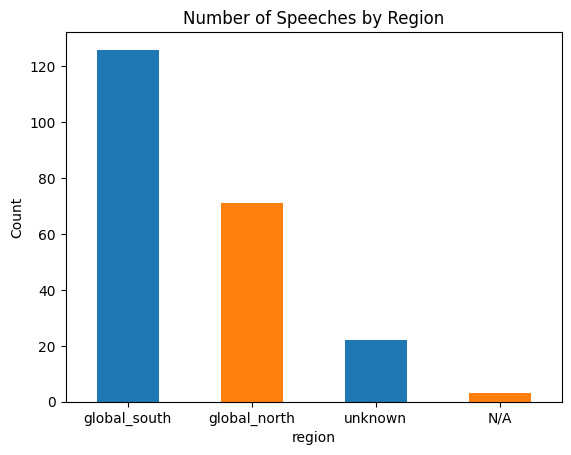

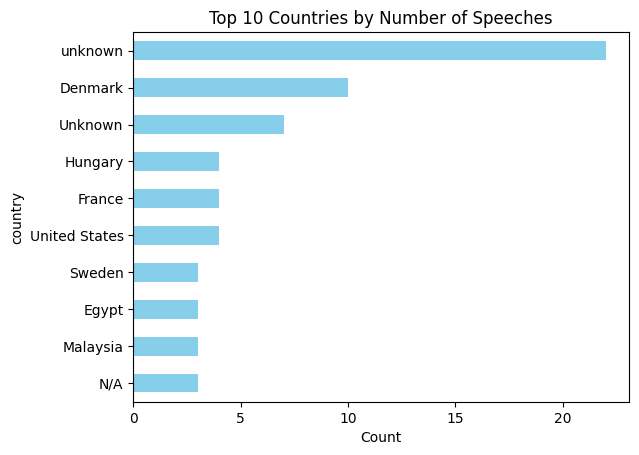

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Region distribution
region_counts = df['region'].value_counts()
region_counts.plot(kind='bar', color=["#1f77b4", "#ff7f0e"])
plt.title("Number of Speeches by Region")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Country distribution (Top 10)
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries by Number of Speeches")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


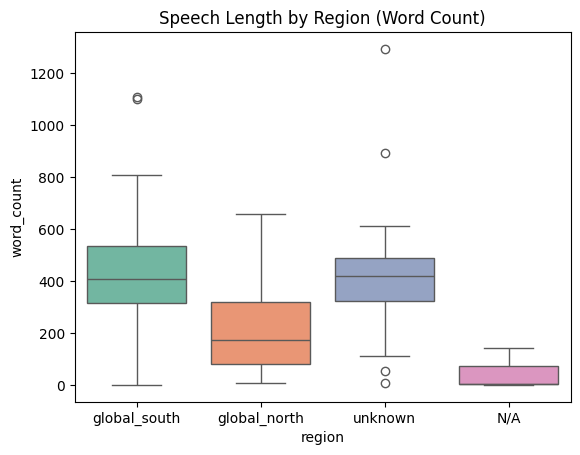

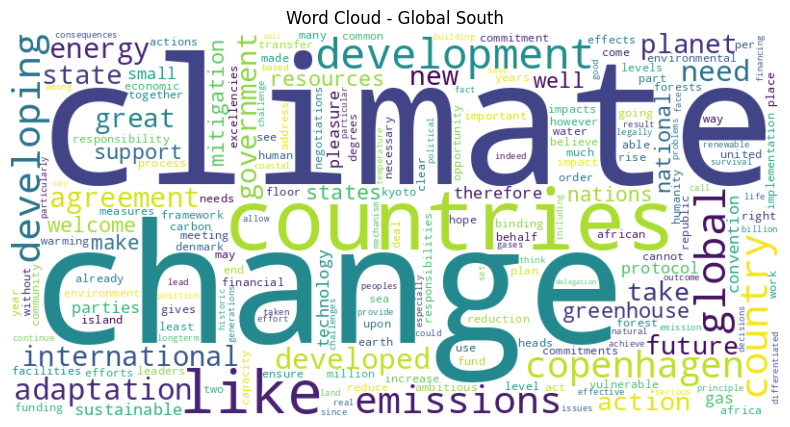

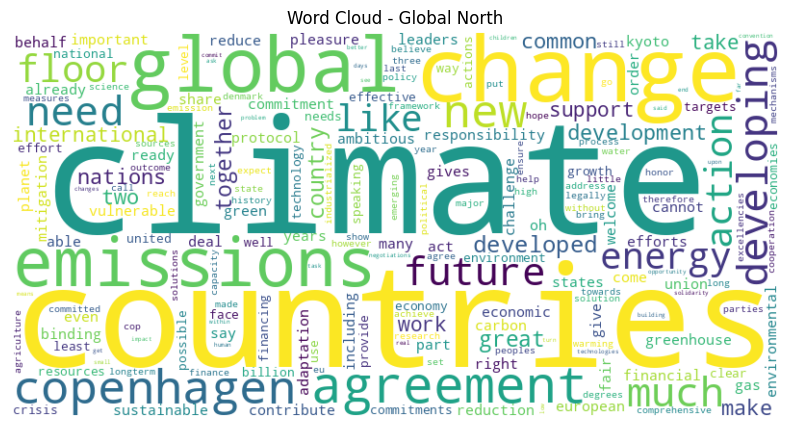

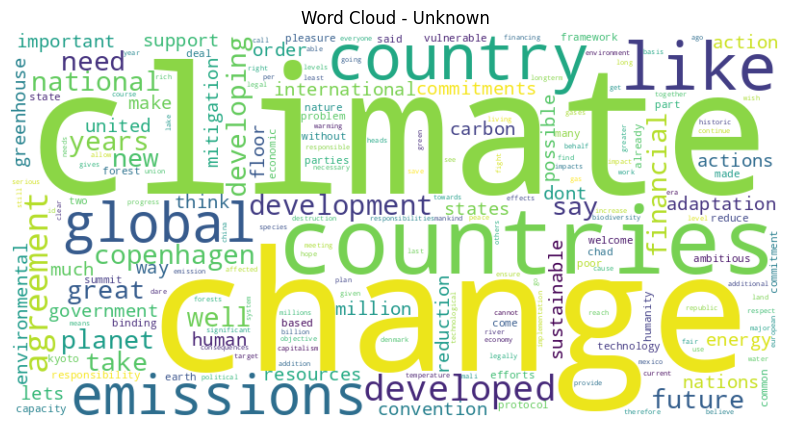

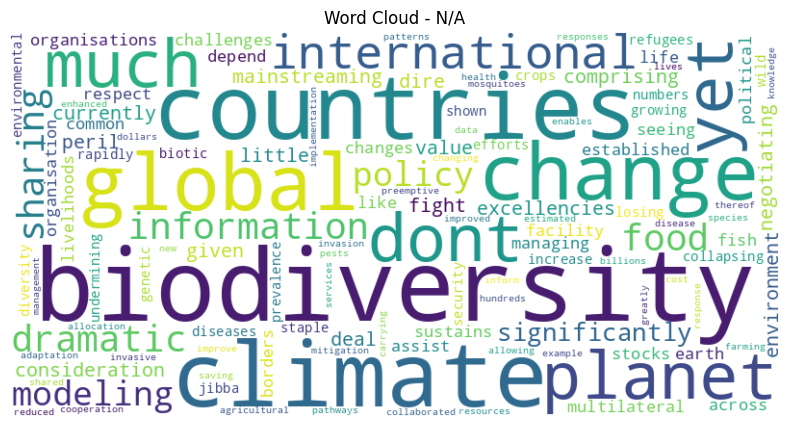

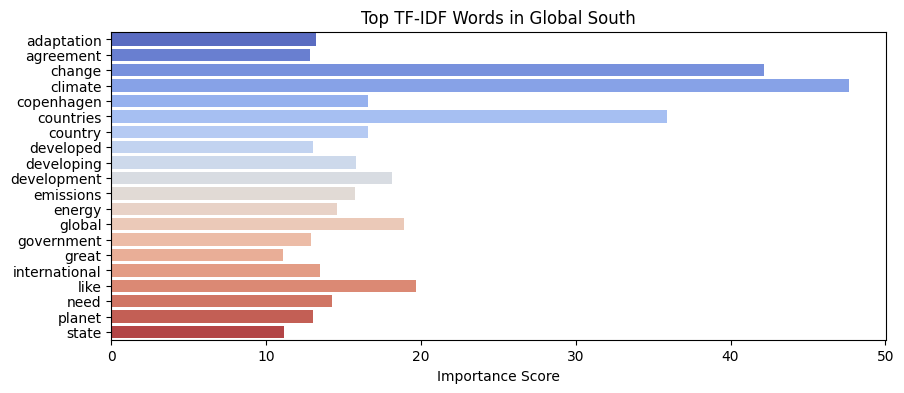

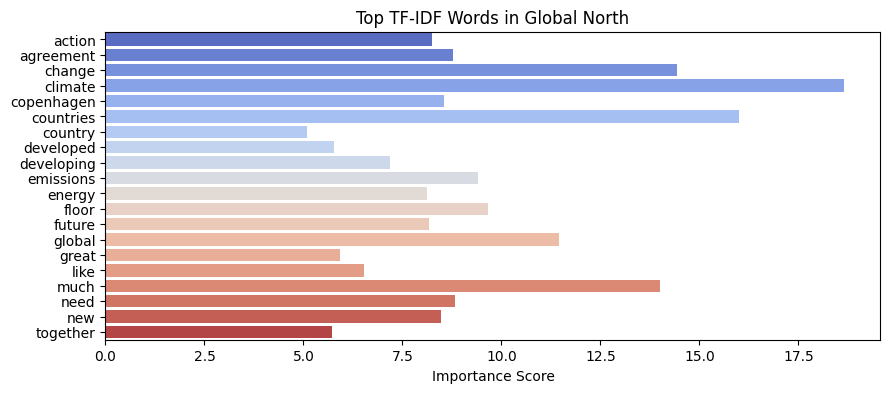

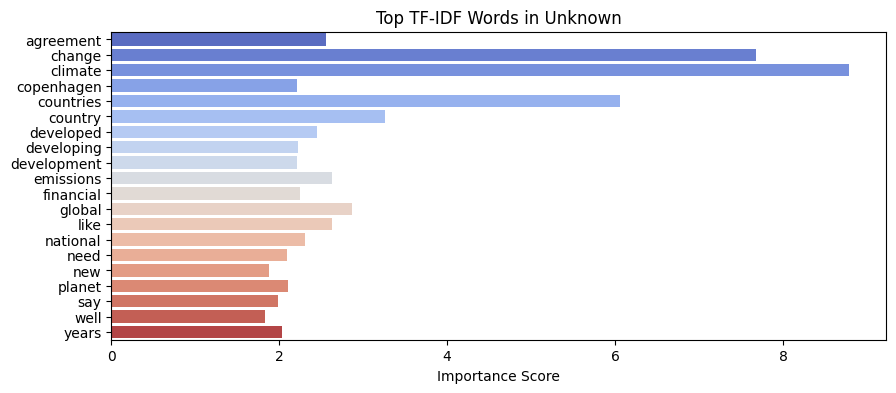

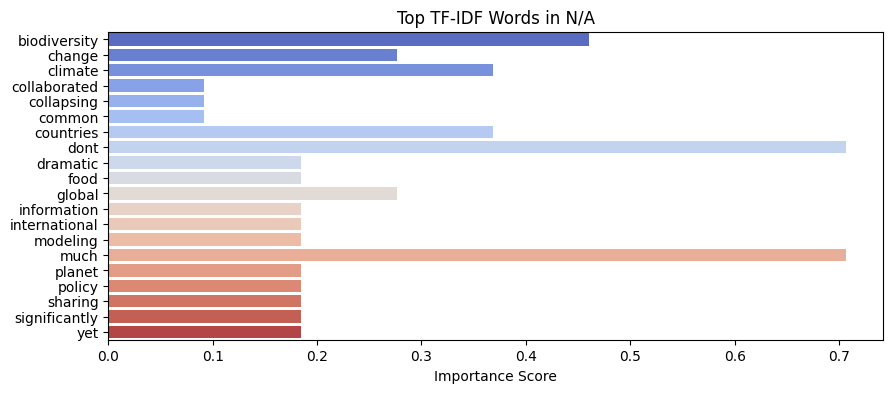

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer

# --- 1. Preprocessing setup ---
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Your extra irrelevant terms to drop
custom_stopwords = {
    "mr", "mrs", "president", "prime", "minister", "excellency", "thank", "thanks",
    "chair", "chairperson", "distinguished", "delegates", "ladies", "gentlemen",
    "statement", "also", "today", "want", "time", "would",
    "let", "first", "one", "say"
    "mr", "must", "world", "time", "one", "us", "people",
    "conference", "today", "madam", "yeah", "madam president", "distinguished heads delegations",
    "im" , "know im", "im im" , "hi", "know", "much much"
}

# Combine NLTK stopwords + custom stopwords
all_stopwords = stop_words.union(custom_stopwords)

# Helper function to preprocess text
def preprocess_text(text):
    # Lowercase, remove punctuation
    text = text.lower().translate(str.maketrans("", "", string.punctuation))
    # Tokenize
    words = text.split()
    # Remove stopwords, numbers, and non-alpha tokens
    words = [w for w in words if w.isalpha() and w not in all_stopwords]
    return words

# --- 2. Word and char count ---
df["word_count"] = df["transcript"].apply(lambda x: len(preprocess_text(x)))
df["char_count"] = df["transcript"].apply(lambda x: len(x))

# Boxplot of speech length by region
sns.boxplot(data=df, x="region", y="word_count", palette="Set2")
plt.title("Speech Length by Region (Word Count)")
plt.show()

# --- 3. Word frequency helper ---
def get_word_freq(texts):
    all_words = []
    for text in texts:
        all_words.extend(preprocess_text(text))
    return Counter(all_words)

# --- 4. Word Clouds ---
for region in df['region'].unique():
    texts = df[df['region'] == region]["transcript"]
    word_freq = get_word_freq(texts)
    wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {region.replace('_', ' ').title()}")
    plt.show()

# --- 5. TF-IDF Analysis ---
def identity_tokenizer(text):
    return preprocess_text(text)

for region in df["region"].unique():
    texts = df[df["region"] == region]["transcript"]

    tfidf = TfidfVectorizer(
        tokenizer=identity_tokenizer,
        lowercase=False, # already done in preprocessing
        max_features=20
    )
    tfidf_matrix = tfidf.fit_transform(texts)
    words = tfidf.get_feature_names_out()
    scores = tfidf_matrix.toarray().sum(axis=0)

    plt.figure(figsize=(10,4))
    sns.barplot(x=scores, y=words, palette="coolwarm")
    plt.title(f"Top TF-IDF Words in {region.replace('_', ' ').title()}")
    plt.xlabel("Importance Score")
    plt.show()

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import re

# 1. Ensure stopwords are available
nltk.download('stopwords')

# 2. Create an extended stopwords list
base_stopwords = set(stopwords.words('english'))
climate_stopwords = {
    "mr", "mrs", "president", "prime", "minister", "excellency", "thank", "thanks",
    "chair", "chairperson", "distinguished", "delegates", "ladies", "gentlemen",
    "statement", "also", "today", "want", "time", "would",
    "let", "first", "one", "say"
    "mr", "must", "world", "time", "one", "us", "people",
    "conference", "today", "madam", "yeah", "madam president", "distinguished heads delegations",
    "im" , "know im", "im im" , "hi", "know", "much much"
}
all_stopwords = base_stopwords.union(climate_stopwords)

# 3. Preprocess text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    return text

df["cleaned_transcript"] = df["transcript"].apply(clean_text)

# 4. Configure CountVectorizer for bigrams/trigrams
vectorizer_model = CountVectorizer(
    stop_words=list(all_stopwords),  # ✅ Convert set to list
    ngram_range=(1, 3),  # unigrams, bigrams, trigrams
    min_df=2
)

# 5. Create BERTopic model with tuned parameters
topic_model = BERTopic(
    vectorizer_model=vectorizer_model,
    min_topic_size=2,     # Allow small but meaningful topics
    nr_topics=None,       # Keep all discovered topics
    verbose=True
)

# 6. Fit the model
topics, probs = topic_model.fit_transform(df["cleaned_transcript"])

# 7. Store topics in DataFrame
df["topic"] = topics

# 8. Visualize topics
topic_model.visualize_topics()

# 9. Distribution of topics by region
topic_counts_region = df.groupby(["region", "topic"]).size().unstack(fill_value=0)
print(topic_counts_region)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-08-20 12:51:00,972 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

2025-08-20 12:51:31,061 - BERTopic - Embedding - Completed ✓
2025-08-20 12:51:31,062 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-20 12:51:41,141 - BERTopic - Dimensionality - Completed ✓
2025-08-20 12:51:41,142 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-20 12:51:41,161 - BERTopic - Cluster - Completed ✓
2025-08-20 12:51:41,166 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-20 12:51:41,586 - BERTopic - Representation - Completed ✓


topic         -1    0    1    2    3    4    5    6    7    8   ...   24   25  \
region                                                          ...             
N/A             0    2    0    0    0    0    0    0    0    0  ...    0    0   
global_north   14    5    8    0    4    0    1    0    2    0  ...    0    0   
global_south   29    6    3   10    5    6    6    7    3    6  ...    3    2   
unknown         6    0    0    0    0    1    0    0    2    0  ...    0    1   

topic          26   27   28   29   30   31   32   33  
region                                                
N/A             0    0    0    0    0    0    0    0  
global_north    1    2    0    1    3    0    1    2  
global_south    2    0    3    1    0    3    1    0  
unknown         0    1    0    1    0    0    0    0  

[4 rows x 35 columns]


<Figure size 3000x700 with 0 Axes>

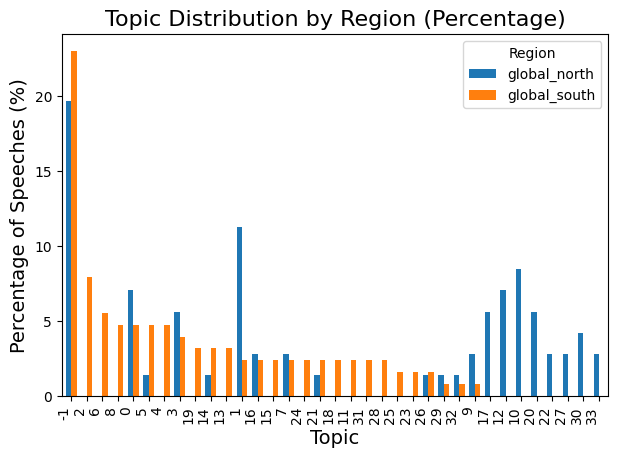

Raw Topic Counts:
region  global_north  global_south
topic                             
-1              14.0          29.0
 0               5.0           6.0
 1               8.0           3.0
 2               0.0          10.0
 3               4.0           5.0
 4               0.0           6.0
 5               1.0           6.0
 6               0.0           7.0
 7               2.0           3.0
 8               0.0           6.0
 9               2.0           1.0
 10              6.0           0.0
 11              0.0           3.0
 12              5.0           0.0
 13              0.0           4.0
 14              1.0           4.0
 15              0.0           3.0
 16              2.0           3.0
 17              4.0           0.0
 18              0.0           3.0
 19              0.0           4.0
 20              4.0           0.0
 21              1.0           3.0
 22              2.0           0.0
 23              0.0           2.0
 24              0.0           3.0
 2

In [ ]:
`import matplotlib.pyplot as plt
import pandas as pd

# 1. Filter out NA and unknown regions
df_filtered = df[df["region"].isin(["global_north", "global_south"])]

# 2. Count how many times each topic appears in each region
topic_counts = df_filtered.groupby(['region', 'topic']).size().reset_index(name='count')

# 3. Pivot table for better visualization
topic_distribution = topic_counts.pivot(index='topic', columns='region', values='count').fillna(0)

# 4. Convert counts to percentages per region
topic_distribution_percent = topic_distribution.div(topic_distribution.sum(axis=0), axis=1) * 100

# 5. Sort topics by their appearance in the Global South (optional)
topic_distribution_percent = topic_distribution_percent.sort_values(by="global_south", ascending=False)

# 6. Plot the percentage distribution
plt.figure(figsize=(30, 7))  # Further increased width to maximize label space
topic_distribution_percent.plot(kind='bar', width=0.7)  # Slightly reduced width to avoid overlap
plt.title("Topic Distribution by Region (Percentage)", fontsize=16)
plt.ylabel("Percentage of Speeches (%)", fontsize=14)
plt.xlabel("Topic", fontsize=14)
plt.legend(title='Region')
plt.xticks(range(len(topic_distribution_percent)), topic_distribution_percent.index, rotation=90, ha='right')  # Increased rotation to 90 degrees and right alignment
plt.tight_layout(pad=1.5)  # Increased padding to prevent clipping
plt.show()

# 7. Optional: also display the dataframes for inspection
print("Raw Topic Counts:")
print(topic_distribution)

print("\nPercentage Distribution:")
print(topic_distribution_percent)

In [ ]:
# Show the top 10 words for each topic
topic_info = topic_model.get_topic_info()
print(topic_info)  # topic IDs, counts, and names

# Get the keywords for a specific topic
for topic_id in topic_info['Topic']:
    print(f"\nTopic {topic_id}:")
    print(topic_model.get_topic(topic_id))  # list of (word, weight) pairs


    Topic  Count                                               Name  \
0      -1     49         -1_climate_change_climate change_countries   
1       0     13                         0_oh_kuwait_change_climate   
2       1     11              1_countries_emissions_ukraine_climate   
3       2     10          2_countries_climate_climate change_change   
4       3      9                3_emissions_need_countries_together   
5       4      7            4_ldcs_climate_climate change_countries   
6       5      7  5_countries_developing countries_developing_cl...   
7       6      7                   6_island_islands_small_emissions   
8       7      7                       7_copenhagen_dare_say_mexico   
9       8      6       8_international_energy_climate change_change   
10      9      6          9_biodiversity_global_farmers_agriculture   
11     10      6                  10_global_new_agreement_countries   
12     11      5                            11_said_lets_think_dont   
13    

In [ ]:
# Get an overview of topics (ID, count, name)
topic_info = topic_model.get_topic_info()
print(topic_info)

# Loop through topics and print their keywords
for topic_id in topic_info['Topic']:
    if topic_id != -1:  # -1 is usually outliers/no topic
        words = topic_model.get_topic(topic_id)
        print(f"\nTopic {topic_id}: {', '.join([w for w, _ in words])}")

    Topic  Count                                               Name  \
0      -1     49         -1_climate_change_climate change_countries   
1       0     13                         0_oh_kuwait_change_climate   
2       1     11              1_countries_emissions_ukraine_climate   
3       2     10          2_countries_climate_climate change_change   
4       3      9                3_emissions_need_countries_together   
5       4      7            4_ldcs_climate_climate change_countries   
6       5      7  5_countries_developing countries_developing_cl...   
7       6      7                   6_island_islands_small_emissions   
8       7      7                       7_copenhagen_dare_say_mexico   
9       8      6       8_international_energy_climate change_change   
10      9      6          9_biodiversity_global_farmers_agriculture   
11     10      6                  10_global_new_agreement_countries   
12     11      5                            11_said_lets_think_dont   
13    